In [180]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/pollution.data.txt", delimiter="\s+")



data.columns = ["PREC", "JANT", "JULT", "OVR", "POPN", "EDUC", "HOUS", "DENS", "NONW", "WWDRK", "POOR", "HC", "NOX", "SOA", "HUMID", "MORT" ]

data.head()


,PREC,JANT,JULT,OVR,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SOA,HUMID,MORT
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.87
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.88
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.35
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.29
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.29


In [7]:
corr_matrix = data.corr()

corr_matrix["MORT"].sort_values(ascending=False)


MORT     1.000000
NONW     0.643742
PREC     0.509500
SOA      0.425898
POOR     0.410490
POPN     0.357307
JULT     0.277018
DENS     0.265503
JANT    -0.030022
NOX     -0.077382
HUMID   -0.088501
OVR     -0.174593
HC      -0.177242
WWDRK   -0.284805
HOUS    -0.426821
EDUC    -0.510988
Name: MORT, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248871D8400>,
      dtype=object)

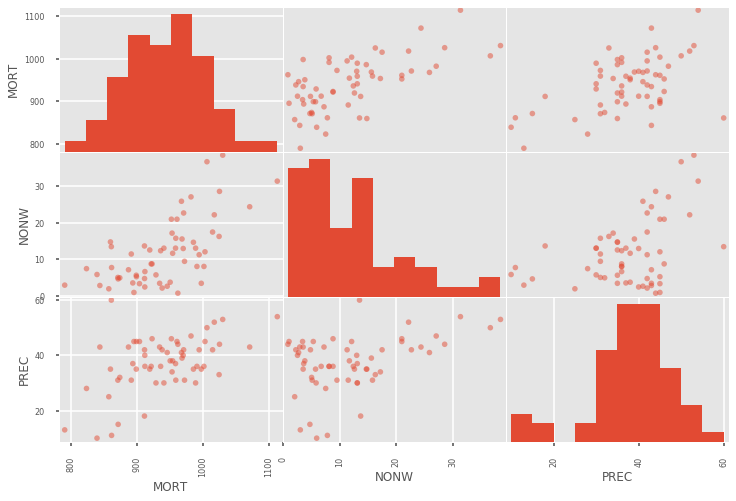

In [25]:
from pandas.plotting import scatter_matrix 

attributes = ["MORT", "NONW", "PREC"]

scatter_matrix(data[attributes], figsize=(12,8))



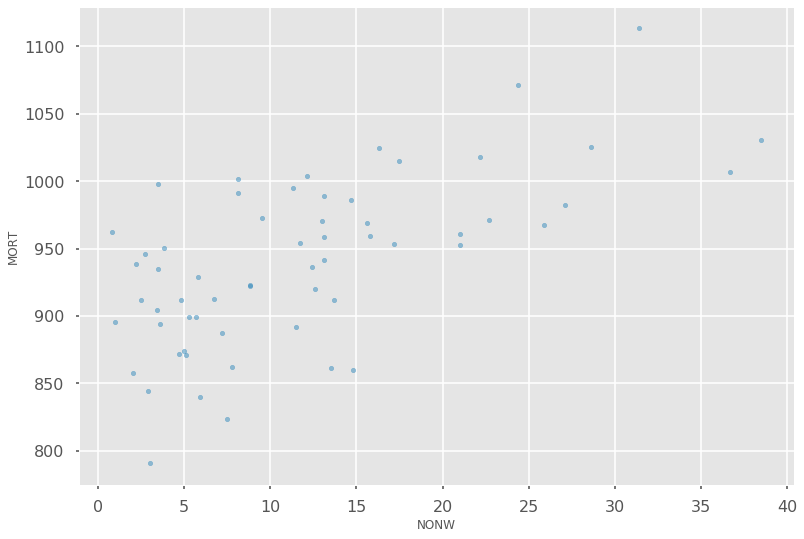

In [24]:
data.plot(kind="scatter", x="NONW", y="MORT", alpha=0.5)

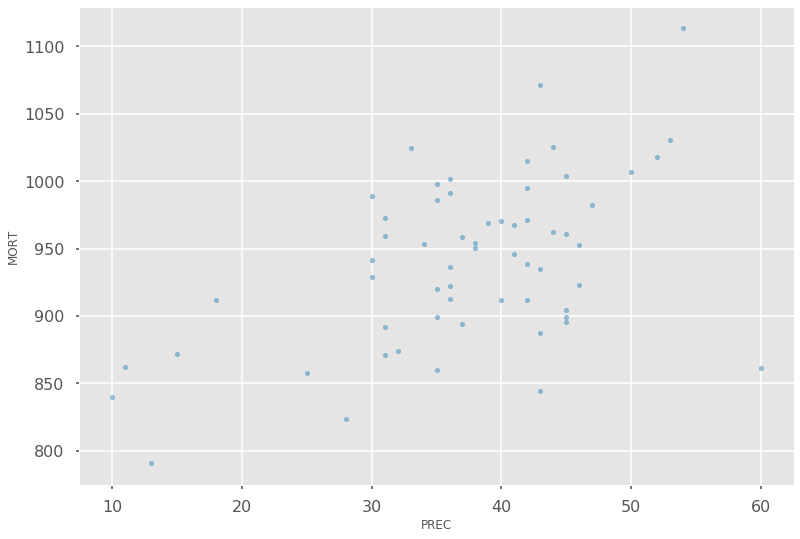

In [23]:
data.plot(kind="scatter", x="PREC", y="MORT", alpha=0.5)

In [13]:

data1 = [data["NONW"], data["MORT"]]
data1 = np.transpose(data1)
data1 = pd.DataFrame(data1, columns=["NONW", "MORT"])

data1.head()


,NONW,MORT
0,8.8,921.87
1,3.5,997.88
2,0.8,962.35
3,27.1,982.29
4,24.4,1071.29


In [14]:
result = smf.ols(formula="MORT ~ NONW", data=data1).fit()
print(result.params)

Intercept    887.076721
NONW           4.488777
dtype: float64


In [45]:
print("El coficiente de terminación está cerca de cero, por lo cual el modelo no es fiable todavía")
print("El intercepto cuando el porcentaje de población de color es 0 indica que la mortalidad promedio es 887. ")
print("La pendiente indica que mientras va creciendo la cantidad de color, la mortalidad aumenta. ")
result.summary()


El coficiente de terminación está cerca de cero, por lo cual el modelo no es fiable todavía
El intercepto cuando el porcentaje de población de color es 0 indica que la mortalidad promedio es 887. 
La pendiente indica que mientras va creciendo la cantidad de color, la mortalidad aumenta. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MORT   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     41.04
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           2.89e-08
Time:                        18:44:47   Log-Likelihood:                -316.41
No. Observations:                  60   AIC:                             636.8
Df Residuals:                      58   BIC:                             641.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    887.0767     10.372     85.523      0.000     866.314     907.839
NONW           4.4888      0.701      6.407      0.000       3.086       5.891
==============================================================================
Omnibus:                        0.425   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.587
Skew:                          -0.109   Prob(JB):                        0.746
Kurtosis:                       2.567   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
result.params

Intercept    887.076721
NONW           4.488777
dtype: float64

Text(0.5, 1.0, 'Relationship between Non-White Population and Mortality')

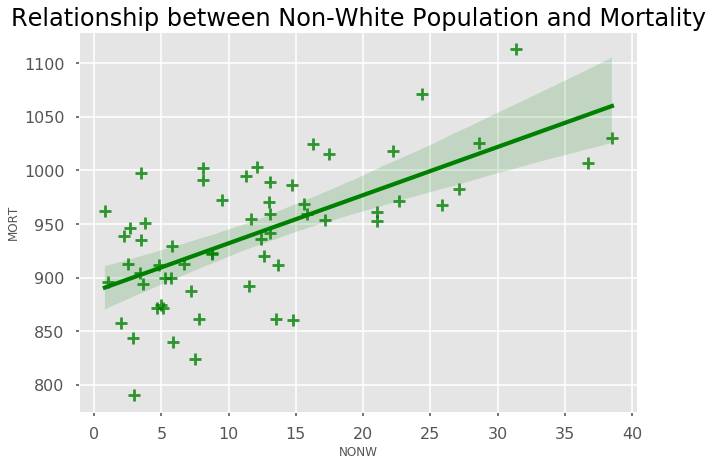

In [43]:
import seaborn as sns 
import matplotlib.style as style 

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

fig = plt.figure(figsize=(10,7))
sns.regplot(x=data.NONW,y=data.MORT,color='green', marker='+')
plt.title('Relationship between Non-White Population and Mortality', size=24)

In [42]:
regall=smf.ols(formula='MORT~PREC+JANT+JULT+OVR+POPN+EDUC+HOUS+DENS+NONW+WWDRK+POOR+HC+NOX+SOA+HUMID',data=data).fit()
regall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MORT   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     9.542
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           2.19e-09
Time:                        18:37:03   Log-Likelihood:                -289.03
No. Observations:                  60   AIC:                             610.1
Df Residuals:                      44   BIC:                             643.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1763.9979    437.330      4.034      0.000     882.617    2645.379
PREC           1.9054      0.924      2.063      0.045       0.044       3.767
JANT          -1.9376      1.108     -1.748      0.087      -4.171       0.296
JULT          -3.1004      1.902     -1.630      0.110      -6.933       0.732
OVR           -9.0652      8.486     -1.068      0.291     -26.168       8.038
POPN        -106.8310     69.780     -1.531      0.133    -247.464      33.801
EDUC         -17.1569     11.860     -1.447      0.155     -41.059       6.746
HOUS          -0.6511      1.768     -0.368      0.714      -4.214       2.912
DENS           0.0036      0.004      0.894      0.376      -0.005       0.012
NONW           4.4596      1.327      3.360      0.002       1.785       7.134
WWDRK         -0.1871      1.662     -0.113      0.911      -3.536       3.162
POOR          -0.1674      3.227     -0.052      0.959      -6.672       6.337
HC            -0.6722      0.491     -1.369      0.178      -1.662       0.317
NOX            1.3401      1.006      1.333      0.190      -0.687       3.367
SOA            0.0863      0.148      0.585      0.562      -0.211       0.384
HUMID          0.1067      1.169      0.091      0.928      -2.250       2.464
==============================================================================
Omnibus:                        2.991   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.088
Skew:                           0.359   Prob(JB):                        0.352
Kurtosis:                       3.566   Cond. No.                     4.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
regall=smf.ols(formula='MORT~PREC+JANT+JULT+OVR+POPN+EDUC+DENS+NONW+HC+NOX',data=data).fit()
regall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MORT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     15.73
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           3.96e-12
Time:                        17:37:32   Log-Likelihood:                -289.33
No. Observations:                  60   AIC:                             600.7
Df Residuals:                      49   BIC:                             623.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1791.2106    361.983      4.948      0.000    1063.778    2518.643
PREC           1.8339      0.837      2.190      0.033       0.151       3.517
JANT          -2.0814      0.718     -2.899      0.006      -3.524      -0.639
JULT          -3.2390      1.399     -2.315      0.025      -6.050      -0.428
OVR           -9.6536      7.246     -1.332      0.189     -24.216       4.909
POPN        -113.7670     64.144     -1.774      0.082    -242.668      15.134
EDUC         -20.6110      7.585     -2.717      0.009     -35.854      -5.368
DENS           0.0035      0.003      1.013      0.316      -0.003       0.011
NONW           4.6163      0.970      4.760      0.000       2.668       6.565
HC            -0.8804      0.322     -2.736      0.009      -1.527      -0.234
NOX            1.7724      0.617      2.872      0.006       0.532       3.012
==============================================================================
Omnibus:                        1.396   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.724
Skew:                           0.197   Prob(JB):                        0.696
Kurtosis:                       3.366   Cond. No.                     3.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred=regall.predict(pd.DataFrame({'PREC': [47], 'JANT':[35], 'JULT': [74], 'OVR': [10.4], 'POPN': [3.21], 'EDUC': [11.0], 'DENS': [6441], 'NONW': [27.1], 'HC': [8], 'NOX': [38]}))
print("El MORT predicho es:",pred[0])

In [ ]:
from math import log,pi
sse=regall.ssr
akaike=82*(log(2*pi*sse/77)+1)+5
print(akaike)

In [ ]:
regall=smf.ols(formula='MORT~PREC+EDUC+NONW+JULT+POPN+HC+NOX',data=data).fit().aic
print(regall)

In [ ]:
regall=smf.ols(formula='MORT~PREC+EDUC+NONW+JULT+NOX+HC',data=data).fit().aic
print(regall)

In [ ]:
# Haciendo una funcion que seleccione las mejores variables usando Forward pero con el AIC
def forward_aic_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 10000.0, 10000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print(best_new_score, best_candidate)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
model=forward_aic_selection(data,"MORT")
print(model.model.formula)
print(model.rsquared_adj)
print(model.aic)

In [ ]:
#Funcion auxiliar que para generar una formula excluyendo una variable
def ols_formula(df, dependent_var, excluded_cols):
    '''
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

def back1(data,best_candidate,response,remaining,current_score):
        scores_with_candidates=[]
        #step 2
        data1=data.drop(best_candidate,axis=1)
        for candidate in remaining:
            formula=ols_formula(data1,response,[candidate])
            score = smf.ols(formula, data1).fit().aic
            scores_with_candidates.append((score,candidate))
        scores_with_candidates.sort(reverse=True)
        worst_new_score, best_candidate = scores_with_candidates.pop()
        print("Feature considered for elimination in this step:",best_candidate) 
        if current_score>worst_new_score:
            remaining.remove(best_candidate)
            current_score = worst_new_score
        return remaining, current_score



#Funcion para hacer backward selection 
def backward_elimination(data,response):
    #Step 0
    formula=ols_formula(data,response,"")
    result = smf.ols(formula, data).fit().aic
    remaining = list(data.columns)
    remaining.remove(response)
    current_score, worst_new_score = result, result
    print('AIC including all the features\n', current_score)
    scores_with_candidates = []
    #Step 1
    for candidate in remaining:
        formula=ols_formula(data,response,[candidate])
        score = smf.ols(formula, data).fit().aic
        scores_with_candidates.append((score,candidate))
    scores_with_candidates.sort(reverse=True)
    worst_new_score, best_candidate = scores_with_candidates.pop()
    print("Feature considered for elimination in this step:",best_candidate, "\nAIC",worst_new_score,"\n")   
    if current_score<worst_new_score:
        print(" Ended at step 1: all the features are important")
    else:
        remaining.remove(best_candidate)
        current_score = worst_new_score
        aic1=current_score
        #print "ac1", aic1
        for step in range (0,8):
            back1(data,best_candidate,response,remaining,current_score)
            formula = "{} ~ {} + 1".format(response, ' + '.join(remaining))
            aic2=smf.ols(formula, data).fit().aic
            #print "aic2", aic2
            if aic2>=aic1:
                break
            else:
                aic1=aic2
                print ("AIC=",aic1)
    print("best AIC:", aic1, "\n","Best Features:", remaining)
    formula = "{} ~ {} + 1".format(response, ' + '.join(remaining))
    print(formula)
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
model=backward_elimination(data,'MORT')
print(model.model.formula)
print(model.rsquared_adj)

In [198]:
studentData = pd.read_csv("student-mat.csv", delimiter=";")

studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [199]:
studentData['G3'].where(studentData['G3'] >= 12, 1, inplace=True, try_cast=True)
studentData['G3'].where(studentData['G3'] < 12, 0, inplace=True)

from sklearn.preprocessing  import LabelEncoder 
lb_make = LabelEncoder()

X2=studentData.copy()
codes = {"school": {"GP": 0, "MS": 1}, "sex": {"F": 0, "M": 1}, "address": {"U": 0, "R": 1}, "famsize": {"GT3": 0, "LE3": 1}, "Pstatus": {"A": 0, "T": 1}, 
        "schoolsup": {"yes": 0, "no": 1}, "paid": {"yes": 0, "no": 1}, "activities": {"yes": 0, "no": 1}, "nursery": {"yes": 0, "no": 1},
        "higher" : {'yes': 1, 'no': 0}, "internet": {"yes": 1, "no": 0}, "romantic": {"yes": 1, "no": 0}, "famsup": {"yes": 1, "no": 0}}
attributes = ['age', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian']
X2.replace(codes,inplace=True)
for attribute in attributes:
    
    X2[attribute] = lb_make.fit_transform(X2[attribute])
    
for column in X2.columns:
    print(X2[column].values)
    print(column)

#studentData
        

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
school
[0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 

In [200]:
from skrebate import ReliefF
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X2 = X2.astype(float)
features, labels = X2.drop('G3', axis=1).values, X2['G3'].values




In [201]:
fs = ReliefF(n_neighbors=3)
fs.fit(X2.drop('G3', axis=1).values, X2['G3'].values)
for feature_name, feature_score in zip(X2.columns,fs.feature_importances_):
    print (feature_name, feature_score)

school 0.021097046413502112
sex 0.0894514767932489
age 0.05569620253164556
address 0.03459915611814343
famsize 0.07257383966244726
Pstatus 0.02700421940928269
Medu 0.080168776371308
Fedu 0.024472573839662438
Mjob 0.02700421940928269
Fjob -0.014345991561181427
reason 0.059915611814346015
guardian -0.0160337552742616
traveltime 0.02531645569620251
studytime 0.021940928270042178
failures -0.005063291139240499
schoolsup 0.008438818565400841
famsup 0.07932489451476789
paid 0.07172995780590709
activities 0.047257383966244716
nursery 0.15274261603375514
higher 0.0008438818565400875
internet 0.013502109704641352
romantic 0.005063291139240514
famrel 0.08776371308016871
freetime 0.015189873417721515
goout 0.023628691983122348
Dalc 0.05654008438818566
Walc 0.080168776371308
health 0.02025316455696205
absences 0.04633473980309424
G1 0.1401898734177216
G2 0.32827004219409284


In [226]:
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



sub = pd.concat([X2['G2'], X2['Walc'], X2['famrel'], X2['famsup'], X2['Dalc'], X2['G1'], X2['nursery']], axis=1)

sub.head()


,G2,Walc,famrel,famsup,Dalc,G1,nursery
0,6.0,1.0,4.0,0.0,1.0,5.0,0.0
1,5.0,1.0,5.0,1.0,1.0,5.0,1.0
2,8.0,3.0,4.0,0.0,2.0,7.0,0.0
3,14.0,1.0,3.0,1.0,1.0,15.0,0.0
4,10.0,2.0,4.0,1.0,1.0,6.0,0.0


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB

X1= sub.values
clf = MultinomialNB()
scores = cross_val_score(clf, X1, labels, cv=10)
scores

array([0.85      , 0.825     , 0.8       , 0.825     , 0.875     ,
       0.82051282, 0.71794872, 0.84615385, 0.84615385, 0.79487179])

In [228]:
print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

Precision: 0.820 (+/- 0.041)


In [229]:
from scipy import linalg
import matplotlib as mpl
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X1,labels)
#Tasa de precision
ldadis.score(X1, labels)

0.9189873417721519

In [230]:
pred=ldadis.predict(X1)
confusion_matrix(labels,pred)

array([[146,  16],
       [ 16, 217]], dtype=int64)

In [231]:
scores = cross_val_score(ldadis, X1, labels, cv=10)
scores

array([0.875     , 0.95      , 0.975     , 0.925     , 0.85      ,
       0.92307692, 0.92307692, 0.82051282, 0.94871795, 0.92307692])

In [232]:
print("Accuracy using LDA: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy using LDA: 0.91 (+/- 0.09)


In [236]:
clf = GaussianNB()
sfs1 = SFS(clf, k_features=3, forward=True, floating=False, verbose=0,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(X1, labels)

In [237]:
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.93924051]),
  'avg_score': 0.9392405063291139,
  'feature_names': ('0',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.93924051]),
  'avg_score': 0.9392405063291139,
  'feature_names': ('0', '2')},
 3: {'feature_idx': (0, 2, 4),
  'cv_scores': array([0.94177215]),
  'avg_score': 0.9417721518987342,
  'feature_names': ('0', '2', '4')}}

In [239]:
sub1 = pd.concat([sub['G2'], sub['famrel'], sub['Dalc']], axis=1)
                 
X3 = sub1.values
                 
scores = cross_val_score(clf, X3, labels, cv=10)
scores

array([0.875     , 0.95      , 1.        , 0.975     , 0.85      ,
       0.8974359 , 0.94871795, 0.97435897, 0.92307692, 0.97435897])

In [240]:
print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

Precision: 0.937 (+/- 0.047)


In [241]:
ldadis = LinearDiscriminantAnalysis().fit(X3,labels)
#Tasa de precision
ldadis.score(X3, labels)

0.9392405063291139

In [242]:
print("Accuracy using LDA: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy using LDA: 0.94 (+/- 0.09)


In [260]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca=PCA(n_components=3)
principalComponents = pca.fit_transform(X1)
pca.components_

array([[-7.56166820e-01,  3.11222788e-02, -7.20234065e-05,
         7.33127910e-03,  1.62837850e-02, -6.53366086e-01,
         6.08169576e-03],
       [-3.16078207e-01, -7.68140413e-01,  1.23816660e-01,
         1.96384215e-02, -4.38656414e-01,  3.18261271e-01,
        -2.50789490e-02],
       [-5.70789564e-01,  3.88518710e-01,  1.64214774e-02,
        -3.72032531e-02,  2.29746024e-01,  6.84546415e-01,
         1.45502237e-02]])

In [262]:
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
pcaDF.head()

,PC1,PC2,PC3
0,7.371404,0.812190,-1.945650
1,8.140911,1.246644,-1.381092
2,4.630866,-1.158381,-0.711352
3,-5.204189,1.361999,0.279873
4,3.731824,-0.882364,-3.192946


In [270]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[23.36484515  2.16127294  1.75364669]
[0.81062067 0.07498327 0.06084107]
[0.81062067 0.88560394 0.94644501]


In [285]:
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,labels)
#Tasa de precision
ypred=ldadis.predict(principalComponents)

In [286]:
ldadis.score(principalComponents, labels)


0.9139240506329114

In [287]:
scores = cross_val_score(ldadis, X1, labels, cv=10)
scores

array([0.875     , 0.95      , 0.975     , 0.925     , 0.85      ,
       0.92307692, 0.92307692, 0.82051282, 0.94871795, 0.92307692])

In [288]:
print("Accuracy using LDA: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy using LDA: 0.91 (+/- 0.09)


In [283]:
clf = GaussianNB()
scores = cross_val_score(clf, principalComponents, labels, cv=10)
scores

array([0.85      , 0.925     , 0.925     , 0.925     , 0.825     ,
       0.8974359 , 0.94871795, 0.8974359 , 0.92307692, 0.92307692])

In [284]:
print("Precision: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

Precision: 0.904 (+/- 0.036)


In [290]:
print("Results: El LDA se mantiene mayormente constante desde A a C, mientras Naive Bayes es más óptimo con PCA ")

Results: El LDA se mantiene mayormente constante desde A a C, mientras Naive Bayes es más óptimo con PCA 
